## Imports

In [1]:
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from openmm.unit import AVOGADRO_CONSTANT_NA, BOLTZMANN_CONSTANT_kB
from openmm.unit import kelvin, bar, litre, kilojoule_per_mole, mole, nanometer, angstrom, kilocalorie_per_mole, molal, molar,grams,milliliter,kilogram
from openmm.unit import Quantity, Unit
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import json

/tmp/ipykernel_46023/3222558274.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
R = BOLTZMANN_CONSTANT_kB * AVOGADRO_CONSTANT_NA # gas constant

def osm_experimental(exp_osm_coeff, molarity:Quantity=1*(mole/litre), vant_hoff:int=2, T=300*kelvin):
    osm_press_ideal=vant_hoff*molarity*R*T
    osm_press_ideal=osm_press_ideal.in_units_of(bar)
    osm_bar=exp_osm_coeff*osm_press_ideal
    op_error=(abs(osm_bar-osm_press_ideal)/osm_press_ideal)*100
    print(f'Ideal Osmotic Pressure: {osm_press_ideal} at concentraion {molarity}')
    print(f'Osmotic Pressure from experimental osmotic coefficient: {osm_bar}')
    return osm_bar


## Results for CHARMM27

## Results for J&Ch

In [21]:
jc_file_1m=open('/home/bamo6610/Documents/GROMACS_files/MDAnalysis/SPW_ALL/JC/final_results_1m.json')
jc_results_1m=json.load(jc_file_1m)


jc_op_1m=jc_results_1m['mean_osmotic_pressure']
jc_operr_1m=jc_results_1m['uncertainity_osmotic_pressure']
jc_oc_1m=jc_results_1m['mean_osmotic_coefficient']
jc_ocerr_1m=jc_results_1m['uncertainity_osmotic_coefficient']

jc_file_2m=open('/home/bamo6610/Documents/GROMACS_files/MDAnalysis/SPW_ALL/JC/final_results_2m.json')
jc_results_2m=json.load(jc_file_2m)
jc_op_2m=jc_results_2m['mean_osmotic_pressure']
jc_operr_2m=jc_results_2m['uncertainity_osmotic_pressure']
jc_oc_2m=jc_results_2m['mean_osmotic_coefficient']
jc_ocerr_2m=jc_results_2m['uncertainity_osmotic_coefficient']

jc_file_3m=open('/home/bamo6610/Documents/GROMACS_files/MDAnalysis/SPW_ALL/JC/final_results_3m.json')
jc_results_3m=json.load(jc_file_3m)
jc_op_3m=jc_results_3m['mean_osmotic_pressure']
jc_operr_3m=jc_results_3m['uncertainity_osmotic_pressure']
jc_oc_3m=jc_results_3m['mean_osmotic_coefficient']
jc_ocerr_3m=jc_results_3m['uncertainity_osmotic_coefficient']

jc_op=[jc_op_1m,jc_op_2m,jc_op_3m]
jc_operr=[jc_operr_1m,jc_operr_2m,jc_operr_3m]
jc_oc=[jc_oc_1m,jc_oc_2m,jc_oc_3m]
jc_ocerr=[jc_ocerr_1m,jc_ocerr_2m,jc_ocerr_3m]

## Concentration list (all force fields should yield the same)

In [6]:
xconc=[0.97597511,1.92192022,2.82282032]

## Harmonic Potentials

In [7]:
#yHP_OP=[51.446412736156844, 106.66259951381392, 166.17702312724953]
yHP_OP=[49.60330410956731,107.95442212972331,165.35041702166302]
yHP_OPerr=[1.4377594603017534, 1.2925065778196625, 0.7761628817232513]

#yHP_OC=[1.0376148047327565, 1.1196967644642293, 1.1861906894913834]
yHP_OC=[1.027788441129123,1.1454552995249385,1.2004925705762055]
yHP_OCerr=[0.029863574195319736, 0.013960244211639883, 0.007542880721910575]

## Experimental

In [8]:
expOC_1m=0.936
expOC_2m=0.984
expOC_3m=1.045

yexpOC=[expOC_1m,expOC_2m,expOC_3m]

In [9]:
expOP_1m=osm_experimental(exp_osm_coeff=0.936,molarity=0.976*(mole/litre))
expOP_2m=osm_experimental(exp_osm_coeff=0.984,molarity=1.923*(mole/litre))
expOP_3m=osm_experimental(exp_osm_coeff=1.045,molarity=2.823*(mole/litre))

yexpOP=[expOP_1m._value,expOP_2m._value,expOP_3m._value]

Ideal Osmotic Pressure: 48.68949309190537 bar at concentraion 0.976 mol/L
Osmotic Pressure from experimental osmotic coefficient: 45.57336553402343 bar
Ideal Osmotic Pressure: 95.93226968825209 bar at concentraion 1.923 mol/L
Osmotic Pressure from experimental osmotic coefficient: 94.39735337324005 bar
Ideal Osmotic Pressure: 140.83036782627957 bar at concentraion 2.823 mol/L
Osmotic Pressure from experimental osmotic coefficient: 147.16773437846214 bar


## Reported by Luo & Roux 2010

In [10]:
yroux=[49.25814435639172,105.63795075630847,160.23739597931342]

1.031


## Plot contrasting osmotic pressure for different force fields

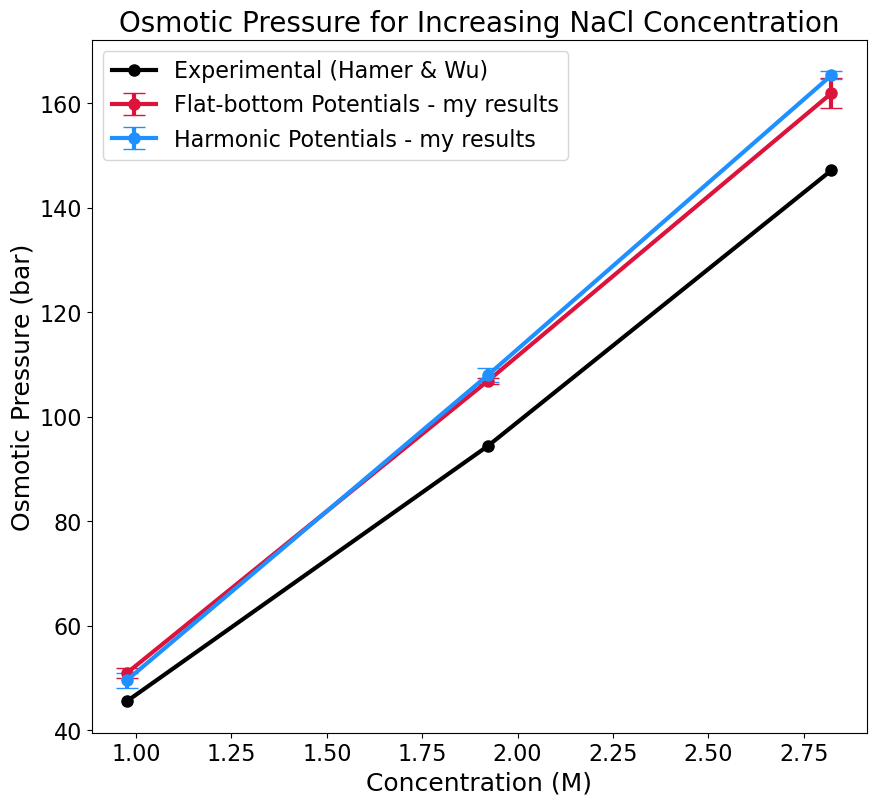

In [55]:
#plt.errorbar(xconc,charmm_op, yerr=charmm_operr, fmt='o', linestyle='-',color='purple', capsize=5, label='CHARMM27')
#plt.plot(xconc,yroux, marker='o', linestyle='-',color='blue', label='Luo & Roux 2010 (CHARMM27)')
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,9))
plt.plot(xconc,yexpOP, marker='o', linestyle='-',color='black', label='Experimental (Hamer & Wu)',linewidth=3,markersize=8)
plt.errorbar(xconc,jc_op, yerr=jc_operr, fmt='o', linestyle='-',color='crimson', capsize=8, label='Flat-bottom Potentials - my results',linewidth=3,markersize=8)
plt.errorbar(xconc,yHP_OP, yerr=yHP_OPerr, fmt='o', linestyle='-',color='dodgerblue', capsize=8, label='Harmonic Potentials - my results',linewidth=3,markersize=8)
plt.xlabel("Concentration (M)", fontsize=MEDIUM_SIZE)
plt.ylabel("Osmotic Pressure (bar)", fontsize=MEDIUM_SIZE)
plt.title('Osmotic Pressure for Increasing NaCl Concentration', fontsize=BIGGER_SIZE)
plt.legend()
plt.savefig('filename.png', dpi=1000)
plt.show()

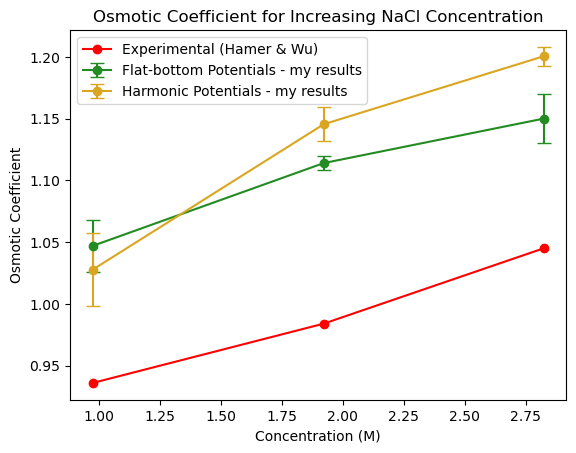

In [26]:
#plt.errorbar(xconc,charmm_op, yerr=charmm_operr, fmt='o', linestyle='-',color='purple', capsize=5, label='CHARMM27')
plt.errorbar(xconc,jc_oc, yerr=jc_ocerr, fmt='o', linestyle='-',color='forestgreen', capsize=5, label='Flat-bottom Potentials - my results')
#plt.plot(xconc,yroux, marker='o', linestyle='-',color='blue', label='Luo & Roux 2010 (CHARMM27)')
plt.plot(xconc,yexpOC, marker='o', linestyle='-',color='red', label='Experimental (Hamer & Wu)')
#plt.plot(xconc,yHP_OC, marker='o', linestyle='-',color='goldenrod', label='Harmonic Potential - my method')
#plt.errorbar(xconc,yHP_OP, yerr=yHP_OPerr, fmt='o', linestyle='-',color='goldenrod', capsize=5, label='Harmonic Potentials - my method')
plt.errorbar(xconc,yHP_OC, yerr=yHP_OCerr, fmt='o', linestyle='-',color='goldenrod', capsize=5, label='Harmonic Potentials - my results')
plt.xlabel("Concentration (M)")
plt.ylabel("Osmotic Coefficient")
# plt.title('Osmotic Pressure for Increasing NaCl Concentration')
plt.title('Osmotic Coefficient for Increasing NaCl Concentration')
plt.legend()
plt.show()

In [ ]:
# yOP=[m1op._value,m2opl._value,m3opl._value]
# yerrs=[m1err._value,m2errl._value,m3errl._value]
# yroux=[49.25814435639172,105.63795075630847,160.23739597931342]
# xconc=[xc1._value,xc2._value,xc3._value]
# yexp=[expOP_1m._value,expOP_2m._value,expOP_3m._value]
# plt.errorbar(xconc,yOP, yerr=yerrs, fmt='o', linestyle='-',color='purple', capsize=5, label='Calculated')
# plt.plot(xconc,yroux, marker='o', linestyle='-',color='blue', label='Luo & Roux 2010')
# plt.plot(xconc,yexp, marker='o', linestyle='-',color='red', label='Experimental (Hamer & Wu)')
# plt.xlabel("Concentration (M)")
# plt.ylabel("Osmotic Pressure (bar)")
# plt.title('Osmotic Pressure for Increasing Concentration (longer)')
# plt.legend()
# plt.show()

### Density profiles using GROMACS

In [ ]:
x,y = np.loadtxt("density_original.xvg",comments=["@", "#"],unpack=True)
y=(y/nanometer**3)/(AVOGADRO_CONSTANT_NA)
y=y.in_units_of(mole/litre)/2
x1,y1 = np.loadtxt("dens_2m.xvg",comments=["@", "#"],unpack=True)
y1=(y1/nanometer**3)/(AVOGADRO_CONSTANT_NA)
y1=y1.in_units_of(mole/litre)/2
x2,y2 = np.loadtxt("dens_3m.xvg",comments=["@", "#"],unpack=True)
y2=(y2/nanometer**3)/(AVOGADRO_CONSTANT_NA)
y2=y2.in_units_of(mole/litre)/2
plt.axvline(x = 4.8, color = 'gray', label = 'walls', linestyle = 'dashed')
plt.axvline(x = 9.6, color = 'gray', linestyle = 'dashed')
plt.axhline(y = 0.98, color = 'lightgray', linestyle = 'dashed')
plt.axhline(y = 1.92, color = 'lightgray', linestyle = 'dashed')
plt.axhline(y = 2.83, color = 'lightgray', linestyle = 'dashed')
# plt.plot(zi_values, potential_energy_values, label=r'$V_{\mathrm{fb}}(z_i)$')
plt.plot(x,y, c='lime', label='1m')
plt.plot(x1,y1, c='limegreen', label='2m')
plt.plot(x2,y2, c='darkgreen', label='3m')
plt.xlabel("Z coordinate (nm)")
plt.ylabel("Molal Concentration (mol/L)")
plt.xticks(np.arange(0, 14.4, 1.0))
#plt.yticks(np.arange(0.0, 1.0, 0.1))
plt.title('Increasing Concentration - J&Ch')
plt.legend(loc='upper right')
plt.show()

FileNotFoundError: dens_2m.xvg not found.

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.16109969
 1.01844182 0.98586204 1.00853671 0.99467951 1.01195742 0.98621906
 0.98766373 0.98478269 0.95921869 0.97236186 0.92033717 0.95291695
 0.96929817 0.95795669 0.95903604 0.97182219 0.95795669 0.95958401
 0.96299642 0.94787721 0.91944048 0.91925782 0.91583711 0.89297979
 0.14525981 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ] mol/L


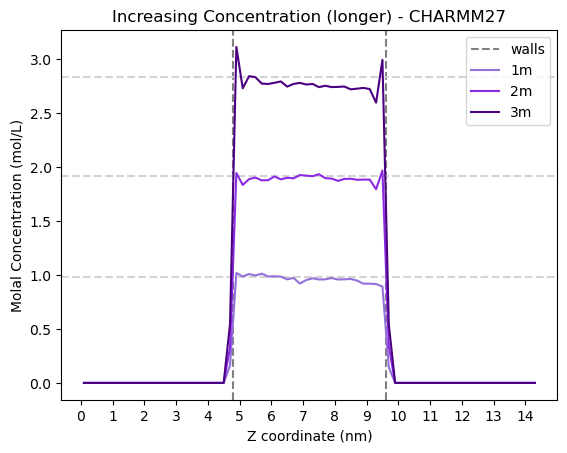

In [ ]:
# x,y = np.loadtxt("density_original.xvg",comments=["@", "#"],unpack=True)
# y=(y/nanometer**3)/(AVOGADRO_CONSTANT_NA)
# y=y.in_units_of(mole/litre)/2
# print(y)
# x1,y1 = np.loadtxt("dens_2ml.xvg",comments=["@", "#"],unpack=True)
# y1=(y1/nanometer**3)/(AVOGADRO_CONSTANT_NA)
# y1=y1.in_units_of(mole/litre)/2
# x2,y2 = np.loadtxt("dens_3ml.xvg",comments=["@", "#"],unpack=True)
# y2=(y2/nanometer**3)/(AVOGADRO_CONSTANT_NA)
# y2=y2.in_units_of(mole/litre)/2
# plt.axvline(x = 4.8, color = 'gray', label = 'walls', linestyle = 'dashed')
# plt.axvline(x = 9.6, color = 'gray', linestyle = 'dashed')
# plt.axhline(y = 0.98, color = 'lightgray', linestyle = 'dashed')
# plt.axhline(y = 1.92, color = 'lightgray', linestyle = 'dashed')
# plt.axhline(y = 2.83, color = 'lightgray', linestyle = 'dashed')
# # plt.plot(zi_values, potential_energy_values, label=r'$V_{\mathrm{fb}}(z_i)$')
# plt.plot(x,y, c='mediumpurple', label='1m')
# plt.plot(x1,y1, c='blueviolet', label='2m')
# plt.plot(x2,y2, c='indigo', label='3m')
# plt.xlabel("Z coordinate (nm)")
# plt.ylabel("Molal Concentration (mol/L)")
# plt.xticks(np.arange(0, 14.4, 1.0))
# #plt.yticks(np.arange(0.0, 1.0, 0.1))
# plt.title('Increasing Concentration (longer) - CHARMM27')
# plt.legend(loc='upper right')
# plt.show()

## Density profiles using MDanalysis

In [ ]:
def density_profile(universe, atom_group, bin_width=0.5, dim='z', method='atom', frameby=1):
    '''Calculate the partial density across the box'''

    if isinstance(atom_group, str): # if provided selection language, make AtomGroup
        ag = universe.select_atoms(atom_group)
    else: # else assume input is AtomGroup
        ag = atom_group

    print(f'\nCalculating the partial density profile of {atom_group} in the {dim} dimension...')

    dims = {'x': 0, 'y': 1, 'z': 2}
    d = dims[dim]
    box = universe.dimensions[d]

    n_bins = int(box / bin_width)
    bins = np.linspace(0, box, num=n_bins)

    counts = np.zeros(n_bins-1)
        
    if len(universe.trajectory) == 0:
        for b in tqdm(range(n_bins-1)):
            lb = bins[b]
            ub = bins[b+1]
            bin_atoms = universe.select_atoms(f'prop {dim} > {lb} and prop {dim} < {ub} and group ag', ag=ag)
            if method in ['atom', 'atoms', 'all']:
                counts[b] += len(bin_atoms)
            elif method in ['molecule', 'mol', 'residue', 'res']: 
                counts[b] += bin_atoms.n_residues
            elif method in ['mass', 'mass density']:
                box_dims = [box[i] for i in range(3) if i != d]
                dV = box_dims[0] * box_dims[1] * (ub-lb) * (10**-8)**3
                mass = bin_atoms.masses.sum() / 6.022 / 10**23
                counts[b] += mass / dV
    else:
        for ts in tqdm(universe.trajectory[::frameby]):
            for b in range(n_bins-1):
                lb = bins[b]
                ub = bins[b+1]
                bin_atoms = universe.select_atoms(f'prop {dim} > {lb} and prop {dim} < {ub} and group ag', ag=ag)

                if method in ['atom', 'atoms', 'all', 'number']:
                    counts[b] += len(bin_atoms)                 
                elif method in ['molecule', 'mol', 'residue', 'res']: 
                    counts[b] += bin_atoms.n_residues
                elif method in ['mass', 'mass density']:
                    box_dims = [box[i] for i in range(3) if i != d]
                    dV = box_dims[0] * box_dims[1] * (ub-lb) * (10**-8)**3
                    mass = bin_atoms.masses.sum() / 6.022 / 10**23
                    counts[b] += mass / dV

        counts = counts / len(universe.trajectory[::frameby])

    return bins, counts

In [ ]:
nbins1_old,ncounts1_old=density_profile(u1,ions,2)

NameError: name 'u1' is not defined

In [ ]:
def density_fprofile(universe, atom_group, bin_width=0.5, dim='z', method='atom', frameby=1):
    '''Calculate the partial density across the box'''

    if isinstance(atom_group, str): # if provided selection language, make AtomGroup
        ag = universe.select_atoms(atom_group)
    else: # else assume input is AtomGroup
        ag = atom_group

    print(f'\nCalculating the partial density profile of {atom_group} in the {dim} dimension...')

    dims = {'x': 0, 'y': 1, 'z': 2}
    d = dims[dim]
    box = universe.dimensions[d]

    n_bins = int(box / bin_width)
    print(box,n_bins,bin_width)
    bins = np.linspace(0, box, num=n_bins)

    bin_atoms = universe.select_atoms(f'group ag', ag=ag)
    ion_indices = bin_atoms.indices
    nframes = len(universe.trajectory[::frameby])
    thisto = np.zeros([n_bins-1,nframes])
    ztraj = np.zeros([len(bin_atoms),nframes])    
    for i,ts in enumerate(tqdm(universe.trajectory[::frameby])):
        ztraj[:,i]= ts.positions[:,d][ion_indices]
        # calculate the histogram at each time point
        counts = np.histogram(ztraj[:,i],bins=bins)
        thisto[:,i] = counts[0]
    # we now have ztraj, get overall histogram
    counts = np.histogram(ztraj,bins=bins)
    return bins, counts[0], thisto

In [ ]:
newbins1,newcounts1,thisto1 = density_fprofile(u1,ions,bin_width=2.0,dim='z')

This new way of doing the counts is the same (it's the total counts, not counts per frame)

In [ ]:
newcounts1-ncounts1_old*1001

Now find the statistical inefficiencies of the histogram time series.

In [ ]:
ncorrs = len(thisto1[:,0])
corrs = np.zeros(ncorrs)
for i in range(ncorrs):
    tsum = np.sum(thisto1[i])
    if tsum !=0:
        corrs[i] = timeseries.statistical_inefficiency(thisto1[i])

In [ ]:
plt.plot(corrs)
plt.ylabel('statistical_efficiency')
plt.xlabel('bin_index')
plt.show()

Now get all three replicate ncounts

In [ ]:
nbins1,ncounts1,thisto1=density_fprofile(u1,ions1,2)
nbins2,ncounts2,thisto2=density_fprofile(u2,ions2,2)
nbins3,ncounts3,thisto3=density_fprofile(u3,ions3,2)

### Effect of changing number of bins

There are 130 total ions in the system. About 25 bins in the middle are occupied. There are 1001 simulation frames, so we would expect somewhere around 5200 counts in each bin.

We can treat this as a multinomial problem, with p_i at each point. If each frame is uncorrelated, the expectation at each point is 1001$\times$130$\times p_i$ = ncounts. So we can approximate each $p_i$ as ncounts/(1001$\times$130).

In [ ]:
# https://en.wikipedia.org/wiki/Multinomial_distribution    
# total observations
# assume there is a multinomial distribution 
# with a probability of each bin being the observed probability 

nions = 130
nframes = 1001

In [ ]:
pi = ncounts1/(nions*1001) # since each ncounts is already divided by 1001

In [ ]:
np.sum(pi) # these probabilities are properly normalized

The variance in the number of counts will be $(1001 \times 130)(p_i)(1-p_i)$, so the standard deviation will be the square root of that.


In [ ]:
stds_multinomial = np.sqrt(nframes*nions*pi*(1-pi))
print(stds_multinomial)

This is the standard deviation in the count number.  We should be seeing a count number of 5000 +/- 70. We are are interested in the standard deviation of the average count number, which we divide by nframes.

Note that this can be approximated for large numbers of bins by simply the square root of the number of bins.  Which turns out to be almost exactly the same!

In [ ]:
stds_simpler = np.sqrt(ncounts1)
print(stds_simpler)
print(stds_simpler/stds_multinomial)

However, if we look at the variation between replicates, it's larger than this simple spread.

In [ ]:
replicates = np.vstack([ncounts1,ncounts2,ncounts3])
vals = np.mean(replicates,axis=0)
errs = np.std(replicates,axis=0,ddof=1) # std
print(vals)
print(errs)
# the variation in the replicates are much bigger

One reason could be that we have fewer effective samples.  Thus, the fractional standard deviation should actually be larger by sqrt(ncorr).

In [ ]:
stds_corrected = stds_multinomial*np.sqrt(corrs)

In [ ]:
plt.plot(stds_corrected,label='multinomial std corrected with correlation time')
plt.plot(errs,label='std from replicates')
plt.ylabel('standard deviations two ways')
plt.xlabel('bin index')
plt.legend()
plt.show()

This looks more reasonable!

In [ ]:
# turn it in to a function
def stdbycount(ncounts,thisto,nions=130,nframes=1001,):
    pi = ncounts/(nions*nframes)
    stds_multinomial = np.sqrt(nframes*nions*pi*(1-pi))
    ncorrs = len(thisto[:,0])
    corrs = np.zeros(ncorrs)
    for i in range(ncorrs):
        tsum = np.sum(thisto[i])
        if tsum !=0:
            corrs[i] = timeseries.statistical_inefficiency(thisto[i])
    return stds_multinomial*np.sqrt(corrs)

In [ ]:
std1 = stdbycount(ncounts1,thisto1)
std2 = stdbycount(ncounts2,thisto2)
std3 = stdbycount(ncounts3,thisto3)

In [ ]:
# this doesn't look so bad - they MOSTLY agree.
plt.plot(std1,label='multinomial w/ correlation 1')
plt.plot(std2,label='multinomial w/ correlation 2')
plt.plot(std3,label='multinomial w/ correlation 3')
plt.plot(errs,label='std from replicates')
plt.ylabel('standard deviations two ways')
plt.xlabel('bin index')
plt.legend()
plt.show()

Theey generally look consistent; a bit noisy, but statistical inefficiency is noisy.

In [ ]:
# mean standard deviation from 3 replicates
stdall = np.sqrt((std1**2+std2**2+std3**2)/3)

In [ ]:
replicates = np.vstack([ncounts1,ncounts2,ncounts3])
vals = np.mean(replicates,axis=0)
errs = np.std(replicates,axis=0,ddof=1)
# error in the mean,so divide by sqrt(3)
plt.errorbar(nbins1[1:],vals,yerr=errs/np.sqrt(3),capsize=3,c='b',alpha=0.3,label='replicates')
plt.errorbar(nbins1[1:],vals,yerr=stdall/np.sqrt(3),capsize=3,c='r',alpha=0.3,label='counts')
plt.ylabel('total counts')
plt.xlabel('z distance')
plt.legend()
plt.show()

When looking at the error in the mean over 3 replicates, the red and blue error bars look reasonably similar. The red bars a little lower, but the blue bars were from 3 replicates, so are pretty noisy. We thus conclude the amount of error is consistent.